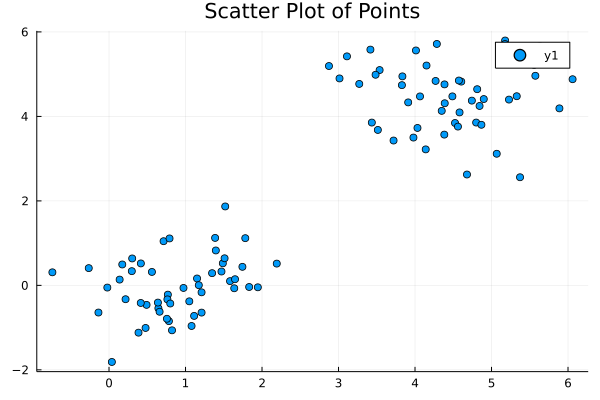

In [58]:
using Random, Distributions
using LinearAlgebra
using Plots

file = open("points.txt", "r");
s = read(file, String);
close(file);

data = reshape(parse.(Float64, split(s)),(2,100))';
gr()
plot(data[:,1], data[:,2], seriestype = :scatter, title = "Scatter Plot of Points")
#savefig("DataScattet.png")

In [59]:
function K_Means(points)
    z1, z2 = Rand_Z(points)
    max_iteration = 10000
    for k = 1 : max_iteration
        z1_partition,z2_partition = Partition(points,z1,z2)   
        z1_new = Centroids(z1_partition)
        z2_new = Centroids(z2_partition)
        if z1_new == z1 && z2_new == z2
            return z1,z2
        else
            z1 = z1_new 
            z2 = z2_new 
        end
    end
    return z1,z2
end

function Centroids(z_partition)
    n = size(z_partition)[1]
    z_x = sum(z_partition[:,1])/n
    z_y = sum(z_partition[:,2])/n
    z = [z_x,z_y]
end

function Partition(points,z1,z2)
    z1_indx = []
    z2_indx = []
    for i = 1 : 100
        point = points[i,:]
        dist1 = Dist(point,z1)
        dist2 = Dist(point,z2)
        if dist1 < dist2
            z1_indx = [z1_indx ; i]
        else
            z2_indx = [z2_indx ; i]
        end
    end
    z1_partition = points[z1_indx,:]
    z2_partition = points[z2_indx,:]
    return z1_partition,z2_partition
end

function Rand_Z(points)
    x_max = maximum(points[:,1])
    x_min = minimum(points[:,1])
    y_max = maximum(points[:,2])
    y_min = minimum(points[:,2])
    z1_x = rand() * (x_max - x_min) + x_min
    z1_y = rand() * (y_max - y_min) + y_min
    z2_x = rand() * (x_max - x_min) + x_min
    z2_y = rand() * (y_max - y_min) + y_min
    z1 = [z1_x , z1_y]
    z2 = [z2_x , z2_y]
    return z1,z2
end
function Dist(p,c)
    dist = ((p[1]-c[1])^2 + (p[2]-c[2])^2)^0.5;
    return dist
end

Dist (generic function with 1 method)

In [60]:
z1,z2 = K_Means(data);
z1_partition,z2_partition = Partition(data,z1,z2);

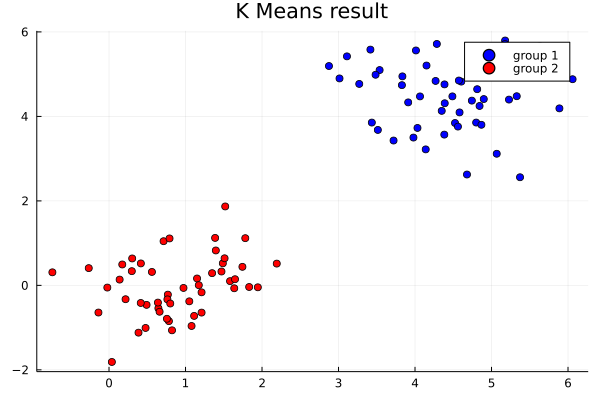

In [61]:
gr()
plot(z1_partition[:,1], z1_partition[:,2], seriestype = :scatter, title = "K Means result", label = "group 1", color = "blue")
plot!(z2_partition[:,1], z2_partition[:,2], seriestype = :scatter, label = "group 2", color = "red")
#savefig("res1.png")

In [63]:
A = [1 0 0 ; 0 1 0]
C = zeros(100,3)
z1_n = size(z1_partition)[1]
z2_n = size(z2_partition)[1]
d = ones(100,1)
for i = 1 : z1_n
    C[i,1] = z1_partition[i,1]
    C[i,2] = z1_partition[i,2]
    C[i,3] = 1
end
for i = 1 : z2_n
    C[i+z1_n,1] = -z2_partition[i,1]
    C[i+z1_n,2] = -z2_partition[i,2]
    C[i+z1_n,3] = -1
end

In [64]:
W = zeros(103,103)
W[1:3,1:3] = 2 * A' * A
W[1:3,4:103] = C'
W[4:103,1:3] = C
U = zeros(103,1)
U[4:103] = d
model = W \ U

LoadError: SingularException(7)

In [65]:
det(W)

0.0